In [2]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import datasets ,layers, models
import matplotlib.pyplot as plt
import numpy as np


In [3]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [14]:

x_test.shape

(10000, 32, 32, 3)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [17]:
classes[9]

'truck'

In [18]:
def sample(x, y ,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

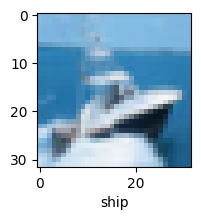

In [25]:
sample(x_train, y_train, 8)

In [24]:
x_train = x_train/255.0
x_test = x_test/255.0

 CONVOLUTIONAL NEURAL NETOWRK 

In [32]:
cnn = keras.Sequential([

    layers.Conv2D(filters=32,  kernel_size=(3,3), activation='relu', input_shape= (32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=32,  kernel_size=(3,3), activation='relu', input_shape= (32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation='softmax')
    
])

cnn.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=20)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.3732 - loss: 1.7174
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5924 - loss: 1.1588
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6408 - loss: 1.0271
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6775 - loss: 0.9342
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7024 - loss: 0.8512
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7165 - loss: 0.8168
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7319 - loss: 0.7685
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7513 - loss: 0.7174
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7627 - loss: 0.6806
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7748 - loss: 0.6466
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7820 - loss: 0.6198
Epoch 12

In [33]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6845 - loss: 1.1350


[1.1513317823410034, 0.6826000213623047]

In [34]:
y_test = y_test.reshape(-1)

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

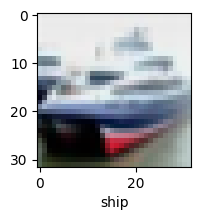

In [36]:
sample(x_test, y_test, 1)

In [37]:
pred = cnn.predict(x_test)
pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[1.00793235e-03, 1.15477716e-09, 4.16355790e-04, 9.42236185e-01,
        1.43589750e-02, 1.18105381e-03, 4.07350697e-02, 2.86252657e-06,
        1.37524503e-05, 4.78228394e-05],
       [2.44086987e-05, 3.31739485e-02, 3.61841590e-12, 4.39601564e-08,
        3.73155906e-13, 5.06963830e-15, 1.78981829e-12, 9.35437670e-16,
        9.66800869e-01, 7.18546858e-07],
       [1.21217838e-03, 9.55842361e-02, 8.30946919e-06, 5.78949600e-03,
        2.54738443e-05, 5.59085129e-06, 2.19727499e-05, 1.64912603e-06,
        8.48845661e-01, 4.85054255e-02],
       [8.72747600e-01, 1.17460839e-01, 3.99186501e-06, 2.58031272e-04,
        1.17378411e-04, 2.15122564e-09, 2.36404412e-06, 1.27800718e-07,
        7.94281252e-03, 1.46692595e-03],
       [7.85309706e-10, 3.14549310e-04, 5.45562594e-04, 1.49702085e-02,
        9.03434992e-01, 3.62812029e-03, 7.71011263e-02, 2.61658073e-07,
        6.31631622e-07, 4.52260156e-06]], dtype=float32)

In [42]:
y_classes = [np.argmax(element) for element in pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [43]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

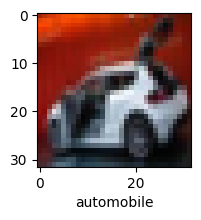

In [55]:
sample(x_test, y_test, 6)

In [56]:
classes[y_classes[6]]

'automobile'

In [52]:
from sklearn.metrics import classification_report
print('classification report:', classification_report(y_test, y_classes))

classification report:               precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.83      0.77      0.80      1000
           2       0.59      0.53      0.56      1000
           3       0.47      0.53      0.50      1000
           4       0.59      0.70      0.64      1000
           5       0.66      0.48      0.55      1000
           6       0.75      0.77      0.76      1000
           7       0.75      0.70      0.73      1000
           8       0.77      0.82      0.79      1000
           9       0.70      0.82      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

